In [3]:
from transformers import GPT2LMHeadModel
import matplotlib.pyplot as plt

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k, v.shape)

model.safetensors:  92%|#########1| 503M/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

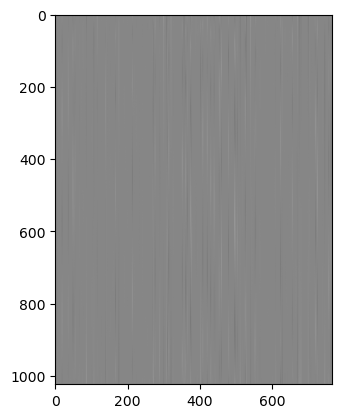

In [6]:
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="gray")
plt.show()

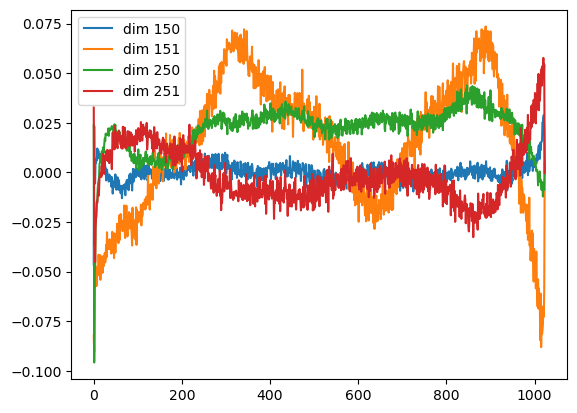

In [15]:
plt.plot(sd_hf["transformer.wpe.weight"][:, 150], label="dim 150")
plt.plot(sd_hf["transformer.wpe.weight"][:, 151], label="dim 151")
plt.plot(sd_hf["transformer.wpe.weight"][:, 250], label="dim 250")
plt.plot(sd_hf["transformer.wpe.weight"][:, 251], label="dim 251")
plt.legend()
plt.show()

In [1]:
import torch

In [2]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self):
        super().__init__()
        self.x = torch.tensor([1, 2, 3, 4, 5])
        self.y = torch.tensor([2, 3, 4, 5, 6])

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [14]:
dataset = MyDataset()
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

In [27]:
max_steps = 9
b = 3
i = 0
it = iter(dataloader)
while i < max_steps:
    for _ in range(b):
        batch = next(it, None)
        if batch is None:
            it = iter(dataloader)
            batch = next(it)
        x, y = batch
        print(x, y)
        i += 1

tensor([4]) tensor([5])
tensor([5]) tensor([6])
tensor([2]) tensor([3])
tensor([1]) tensor([2])
tensor([3]) tensor([4])
tensor([3]) tensor([4])
tensor([2]) tensor([3])
tensor([4]) tensor([5])
tensor([1]) tensor([2])
